# EDA for Bellabeat

## Questions that need to be answers 

### 1. What are some usage trends for smart devices?
### 2. How could these trends be applied to Bellabeat's clients?
### 3. How could these trends help influence Bellabeat's marketing strategy?

The information come from [kaggle](https://www.kaggle.com/datasets/arashnic/fitbit)

## Importing the necessary libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data 

In [6]:
daily_activity = pd.read_csv('/mnt/c/Users/ricar/Documents/bellabeat/data/dailyActivity_merged.csv')
sleep_day = pd.read_csv('/mnt/c/Users/ricar/Documents/bellabeat/data/sleepDay_merged.csv')
weight_log_info = pd.read_csv('/mnt/c/Users/ricar/Documents/bellabeat/data/sleepDay_merged.csv')
daily_calories = pd.read_csv('/mnt/c/Users/ricar/Documents/bellabeat/data/dailyCalories_merged.csv')
daily_intensities = pd.read_csv('/mnt/c/Users/ricar/Documents/bellabeat/data/dailyIntensities_merged.csv')
daily_steps = pd.read_csv('/mnt/c/Users/ricar/Documents/bellabeat/data/dailySteps_merged.csv')

# knowing my data

In [7]:
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [8]:
daily_activity.shape[0] # enrtries <= 940 observations

940

In [9]:
daily_activity.shape[1] # entries = 15 categories

15

In [10]:
daily_activity.info() # change activity day to object to daytime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [14]:
# chage ActiivityDato from object to datetime
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])

In [15]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [20]:
# how many participans there are?
daily_activity['Id'].value_counts().count()

33

In [22]:
daily_activity[['TotalSteps','TotalDistance','SedentaryMinutes','Calories']].describe()

,TotalSteps,TotalDistance,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,991.210638,2303.609574
std,5087.150742,3.924606,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,729.750000,1828.500000
50%,7405.500000,5.245000,1057.500000,2134.000000
75%,10727.000000,7.712500,1229.500000,2793.250000
max,36019.000000,28.030001,1440.000000,4900.000000


## Acording to [Centers for Disease Control and Prevention](https://www.cdc.gov/diabetes/prevention/pdf/postcurriculum_session8.pdf) the goal is 10,000 steps each day, and only 25% of people of dailyactivity dataset made this steps.

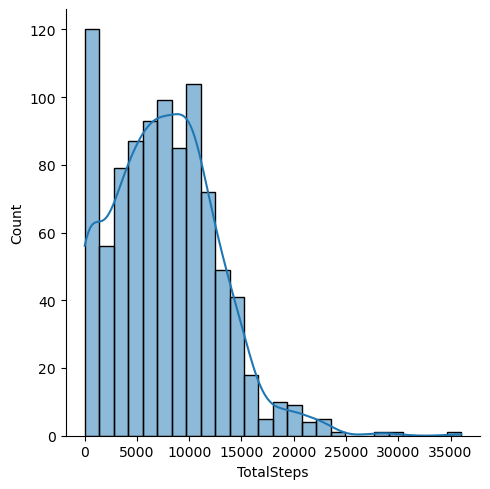

In [25]:
sns.displot(data=daily_activity,x="TotalSteps",kde=True)

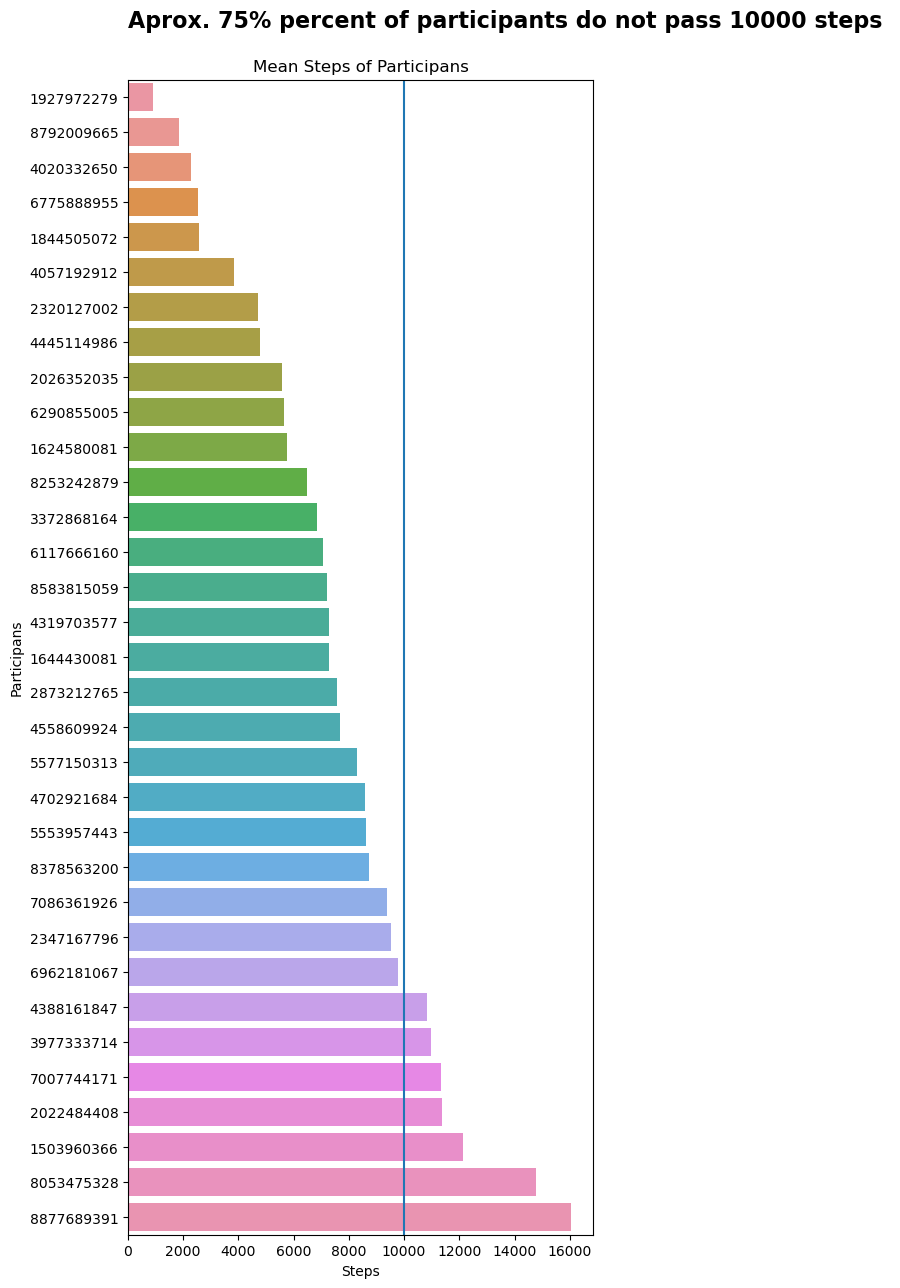

In [84]:
# this logic is for get and order list of the mean of totalsteps in every id
steps=daily_activity[["Id","TotalSteps"]].groupby("Id").mean().reset_index().sort_values('TotalSteps',ascending=False)
# Initialize the matpltlib figure
f,ax = plt.subplots(figsize=(6,15))
# plot the Totalsteps
graph=sns.barplot(x="TotalSteps",y="Id",data=steps,orient='h',order=steps.sort_values('TotalSteps',ascending=True).Id)
# Draw vertical line with values
graph.axvline(10000)
# labels 
graph.set(xlabel='Steps',ylabel='Participans',title='Mean Steps of Participans')
plt.text(x=4.7, y=-2, s='Aprox. 75% percent of participants do not pass 10000 steps ', fontsize=16, weight='bold')
# plot the graph
plt.show()



In [ ]:
# make 100000 steps, people ten to have better 